In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## Read Dataset

In [2]:
df = pd.read_csv('dataset.csv')

In [3]:
df.head()

,DATE,SALES
0,9/30/18,39
1,10/1/18,25
2,10/2/18,48
3,10/3/18,32
4,10/4/18,87


In [4]:
df.tail()

,DATE,SALES
168,3/21/19,32
169,3/22/19,11
170,3/23/19,22
171,3/24/19,29
172,3/25/19,14


In [5]:
df['DATE']=pd.to_datetime(df['DATE'])

In [6]:
df.head()

,DATE,SALES
0,2018-09-30,39
1,2018-10-01,25
2,2018-10-02,48
3,2018-10-03,32
4,2018-10-04,87


## Make Date As Index

In [7]:
df.set_index('DATE',inplace=True)

In [8]:
df.head()

,SALES
DATE,
2018-09-30,39
2018-10-01,25
2018-10-02,48
2018-10-03,32
2018-10-04,87


In [9]:
df.describe()

,SALES
count,173.000000
mean,31.017341
std,27.029586
min,0.000000
25%,10.000000
50%,25.000000
75%,43.000000
max,149.000000


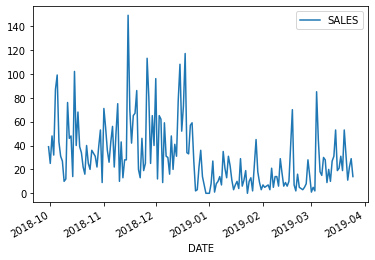

In [10]:
df.plot()

## Check Data is Stationary or Not

In [11]:
from statsmodels.tsa.stattools import adfuller

In [12]:
test_result=adfuller(df['SALES'])

In [13]:
#h0: It is not stationary
#h1: It is stationary


def adfuller_test(sales):
    result=adfuller(sales)
    labels=['ADF Test Statistics','p-value','#Lags used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+':'+str(value))
    
    if result[1]<=0.05:
        print("It is stationary")
    else:
        print("It is not stationary")

    
    

In [14]:
adfuller_test(df['SALES'])

ADF Test Statistics:-3.7402398092017055
p-value:0.003581458965448992
#Lags used:3
Number of Observations Used:169
It is stationary


## Find P and Q values Autocorrelation and Partial Autocorrelation resp.

In [15]:
import statsmodels as sm

In [16]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

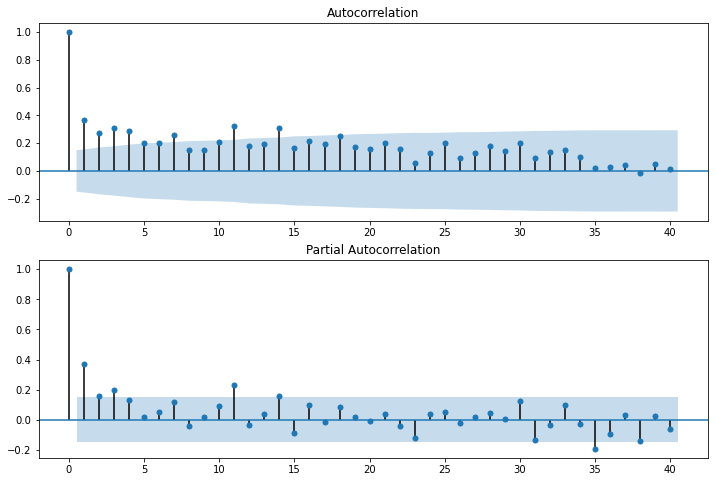

In [17]:
fig = plt.figure(figsize=(12,8))
ax1 = plt.subplot(211)
fig = plot_acf(df['SALES'],lags=40,ax=ax1)
ax2 = plt.subplot(212)
fig = plot_pacf(df['SALES'],lags=40,ax=ax2)

## ARIMA Model

In [18]:
from statsmodels.tsa.arima_model import ARIMA

In [19]:
#for non-seasonal data
#p=1 d=0 q=1
model = ARIMA(df['SALES'],order=(1,0,1))
ar = model.fit()

C:\Users\rajes\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


In [20]:
ar.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                  SALES   No. Observations:                  173
Model:                     ARMA(1, 1)   Log Likelihood                -795.093
Method:                       css-mle   S.D. of innovations             23.935
Date:                Sat, 22 May 2021   AIC                           1598.185
Time:                        20:11:39   BIC                           1610.799
Sample:                             0   HQIC                          1603.302
                                                                              
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const          31.6258      7.396      4.276      0.000      17.130      46.121
ar.L1.SALES     0.9596      0.038     25.217      0.000       0.885       1.034
ma.L1.SALES    -0.8193      0.090     -9.073      0.000      -0.996      -0.642
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0421           +0.0000j            1.0421            0.0000
MA.1            1.2205           +0.0000j            1.2205            0.0000
-----------------------------------------------------------------------------
"""

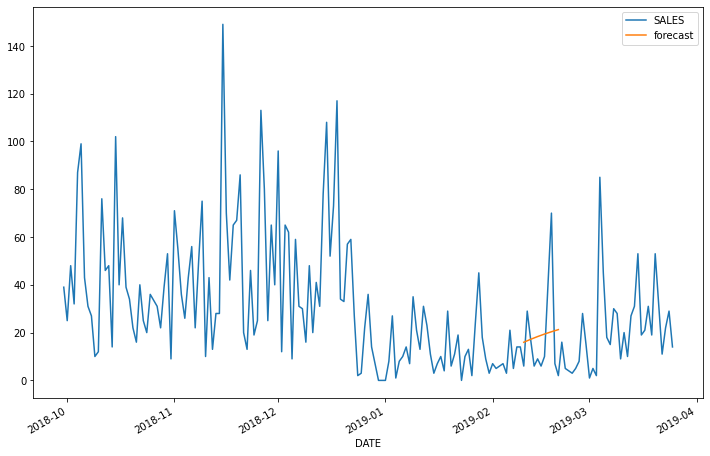

In [21]:
df['forecast']=ar.predict(start=130, end = 140, dynamic=True)
df[['SALES','forecast']].plot(figsize=(12,8))

## SARIMA Model

In [22]:
import statsmodels.api as sm

In [23]:
model=sm.tsa.statespace.SARIMAX(df['SALES'],order=(1,0,1),seasonal_order=(1,1,1,12))
results=model.fit()

C:\Users\rajes\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\rajes\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


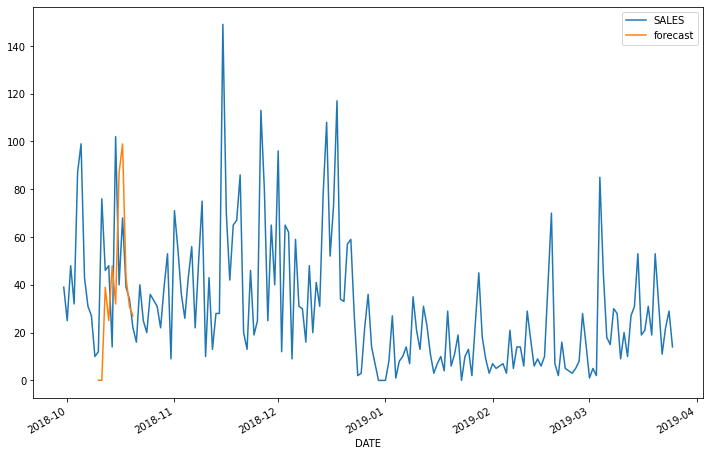

In [24]:
df['forecast']=results.predict(start=10, end = 20, dynamic=True)
df[['SALES','forecast']].plot(figsize=(12,8))

## Prediction on Future Data

In [25]:
from pandas.tseries.offsets import DateOffset
future_dates=[df.index[-1]+ DateOffset(days=x) for x in range(0,10)]

In [26]:
future_dates

[Timestamp('2019-03-25 00:00:00'),
 Timestamp('2019-03-26 00:00:00'),
 Timestamp('2019-03-27 00:00:00'),
 Timestamp('2019-03-28 00:00:00'),
 Timestamp('2019-03-29 00:00:00'),
 Timestamp('2019-03-30 00:00:00'),
 Timestamp('2019-03-31 00:00:00'),
 Timestamp('2019-04-01 00:00:00'),
 Timestamp('2019-04-02 00:00:00'),
 Timestamp('2019-04-03 00:00:00')]

In [27]:
future_date_df = pd.DataFrame(index=future_dates[1:],columns=df.columns)

In [28]:
future_df=pd.concat([df,future_date_df])

In [29]:
future_df

,SALES,forecast
2018-09-30,39,NaN
2018-10-01,25,NaN
2018-10-02,48,NaN
2018-10-03,32,NaN
2018-10-04,87,NaN
...,...,...
2019-03-30,NaN,NaN
2019-03-31,NaN,NaN
2019-04-01,NaN,NaN
2019-04-02,NaN,NaN


C:\Users\rajes\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


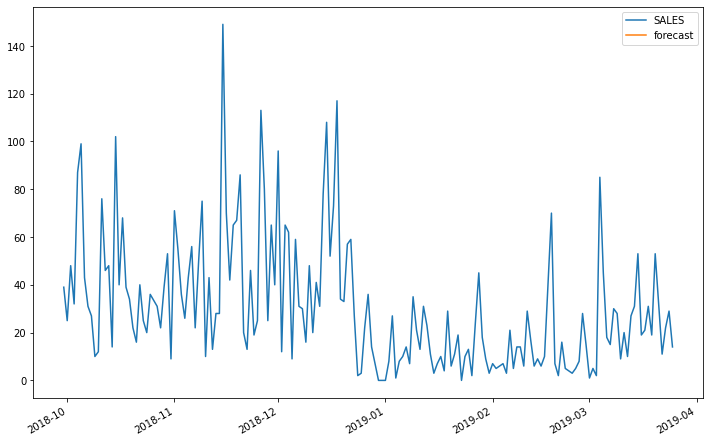

In [30]:
future_df['forecast']=results.predict(start=173,end=175 ,dynamic=True)
future_df[['SALES','forecast']].plot(figsize=(12,8))